# 1 动手学概率

## 1.1 随机现象与概率

* 随机现象：在一定条件下,并不总是出现相同结果的现象。

* 随机试验：很多随机现象是可以大量重复的，如抛一枚硬币可以无限次重复，不同麦穗上的麦粒数可以大量观察等，这种可重复的随机现象又称为随机试验，简称试验。

* 随机事件：随机现象的某些基本结果组成的集合称为随机事件，简称事件,常用大写字母（如$A、B、C$）表示。

* 事件间的关系与事件的运算，设实验$E$的样本空间为$S$，而$A、B、A_{k}, (k=1,2, \cdots)$是$S$的子集。
  * 1. 若 $A \subset B$，则称事件$B$包含事件$A$。若$A\subset B 且 B\subset A$, 则 $A = B$。
  * 2. 事件$A\cup B = \{x| x\in A 或x \in B\}$称为 事件$A$和事件$B$的**和事件**。
  * 3. 事件$A \cap B = \{x| x\in A 且x \in B\}$称为 事件$A$和事件$B$的**积事件**。
  * 4. 事件$A - B = \{x| x\in A 且x \notin B\}$称为 事件$A$和事件$B$的**差事件**。
  * 5. 若$A \cap B = \varnothing$，则称事件$A$与事件$B$**互不相容（或互斥）**。
  * 6. 若$A \cup B = S$，则称事件$A$与事件$B$**互为逆事件（对立事件）**。
  * 7. 交换律：$A\cup B = B\cup A, A\cap B = B \cap A$。
  * 8. 结合律：$A \cup (B \cup C) = (A \cup B) \cup C, A \cap (B \cap C) = (A \cap B) \cap C$。
  * 9. 分配律: $A\cup (B \cap C) = (A \cup B)\cap (A \cup C), A\cap (B \cup C) = (A \cap B)\cup (A \cap C)$。
  * 10. 德摩根律：$\overline{A\cup B}=\bar{A}\cap \bar{B}, \overline{A\cap B}=\bar{A}\cup \bar{B}$。

* 事件的概率：表示事件发生的可能性。
> 事件的概率$P(\cdot)$满足的条件：
> - 1. 非负性：对于每一个事件$A, P(A) \ge 0$。
> - 2. 规范性：对于必然事件$S, P(S) = 1$。
> - 3. 可列可加性：设$A_{1}, A_{2}, \cdots, A_{k}$是两两不相容的事件，即$A_{i}A_{j}=\varnothing, i\ne j, i,j = 1,2, \cdots, k.$，有$$P(A_{1}\cup A_{2}\cup \cdots \cup A_{k}) = P(A_{1})+P(A_{2})+\cdots +P(A_{k})$$。

* 事件的独立性：若事件$A$和事件$B$满足 $P(AB)=P(A)P(B)$，则称事件$A$和事件$B$相互独立。
> - 定理一：设$A, B$是两事件，且$P(A) > 0$，若$A, B$相互独立，则$P(B|A) =P(B)$，反之亦然（$P(A|B) = P(A)$）。
> - 定理二：若事件$A, B$相互独立，则下列各对事件也相互独立：$$A与\bar{B},  \bar{A}与B,  \bar{A}与\bar{B}$$ 

python代码（模拟频率近似概率）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import random

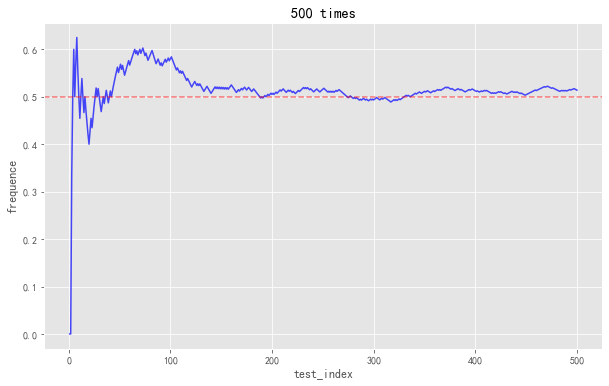

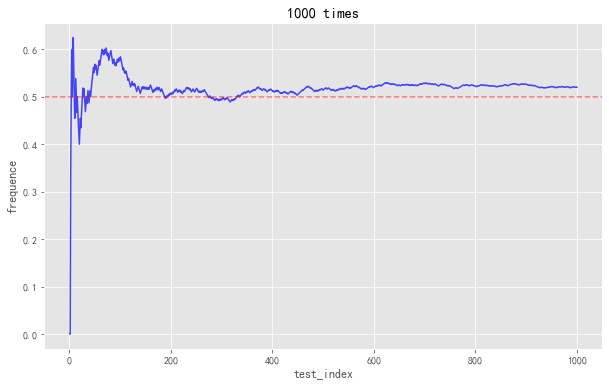

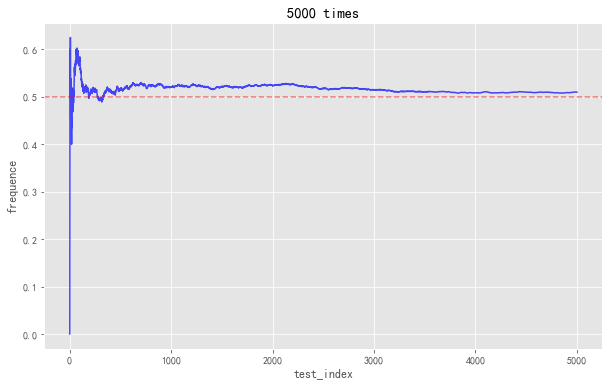

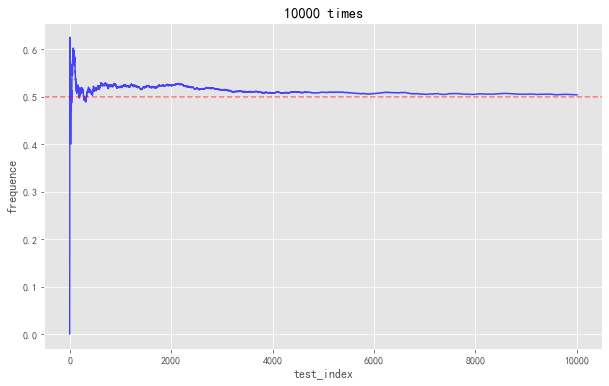

In [2]:
def simulat_coin(test_num):
    random.seed(100)
    coin_list = [1 if random.random() >= 0.5 else 0 for i in range(test_num)]
    coin_frequence = np.cumsum(coin_list) / (np.arange(len(coin_list)) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(coin_list)) + 1, coin_frequence, c='blue', alpha=0.7)
    plt.axhline(0.5, linestyle='--', c='red', alpha=0.5)
    plt.xlabel('test_index')
    plt.ylabel('frequence')
    plt.title(f"{str(test_num)} times")
    plt.show()

simulat_coin(500)
simulat_coin(1000)
simulat_coin(5000)
simulat_coin(10000)

## 1.2 条件概率、乘法公式、全概率公式与贝叶斯公式

* 条件概率：考虑的是事件$A$已发生的条件下事件$B$发生的概率，记为 $P(B|A)$。条件概率的计算公式为：
$$P(B|A) = \frac{P(AB)}{P(A)}$$

> 条件概率$P(\cdot|A)$也满足概率定义的三个条件：
> - 1. 非负性：对于每一个事件$B$，有$P(B|A) \ge 0$。
> - 2. 规范性：对于必然事件$S$，有$P(S|A) = 1$。
> - 3. 可列可加性：设$B_{1}, B_{2}, \cdots, B_{k}$是两两不相容事件，则有：$$P(B_{1}\cup B_{2} \cup \cdots \cup B_{k}|A) = P(B_{1}|A) + P(B_{2}|A) + \cdots + P(B_{k}|A)$$

* 乘法公式（定理）：设$P(A)> 0$，由条件概率的计算公式可推得：
$$P(AB) = P(B|A)P(A)$$
> 推广到多个事件的积事件的情况：
> - $P(ABC) = P(C|AB)P(B|A)P(A)$
> - $P(A_{1}A_{2}\cdots A_{n}) = P(A_{n}|A{1}\cdots A_{n-1})P(A_{n-1}|A_{1}\cdots A_{n-2})\cdots P(A_{2}|A{1})P(A_{1})$

* 全概率公式：设实验$E$的样本空间为$S$，$A$为$E$的事件，$B_{1}, B{2}, \cdots, B_{n}$为$S$的一个划分，且$P(B_{i}) > 0 (i=1, 2, \cdots, n)$，则
\begin{aligned}
P(A)  &= P(AB_{1}) + P(AB_{2}) + \cdots + P(AB_{n}) \\
&= P(A|B_{1})P(B_{1}) + P(A|B_{2})P(B_{2}) + \cdots + P(A|B_{n})P(B_{n})
\end{aligned}

* 贝叶斯公式：设实验$E$的样本空间为$S$，$A$为$E$的事件，$B_{1}, B_{2}, \cdots, B_{n}$为$S$的一个划分，且$P(A)>0, P(B_{i})>0 (i=1,2, \cdots, n)$，则
\begin{aligned}
P(B_{i}|A) = \frac{P(AB_{i})}{P(A)} 
= \frac {P(A|B_{i})P(B_{i})}{P(A|B_{1})P(B_{1})+P(A|B_{2})P(B_{2})+ \cdots P(A|B_{n})P(B_{n})}
\end{aligned}

##### **三门问题**(例子)：是一个源自博弈论的数学游戏问题, 大致出自美国的 电视游戏节目 Let's Make a Deal。问题的名字来自该节目的主持人蒙提・霍尔 (Monty Hall)。这个游戏的玩法是：参赛者会看见三扇关闭了的门，其中一扇的后面有一辆汽车，选中后面有车的那扇门就可以赢得该汽车, 而另外两扇门后面则各藏有一只山羊。当参赛者选定了一扇门，但未去开启它的时候，节目主持人会开启剩下两扇门的其中一扇, 露出其中一只山羊。主持人其后会问参赛者要不要换另一扇仍然关上的门。问题是：换另一扇门会否增加参赛者赢得汽车的机会率？

分析：设$A_{i} (i = 1, 2, 3)$表示第$i$扇门及门后为山羊，$\bar{A_{i}}$表示第$i$扇门及门后为汽车。

1. 参赛者不改变决策时，则结果和主持人没有关系，只与参赛者与门后面的物品有关，参赛者选中门$i$为汽车的概率为：
<style>
table
{
    margin: auto;
}
</style>

|门1（车）|门2（羊）|门3（羊）|
|:---:|:---:|:---:|

$$P(car) = \frac{1}{3}$$

2. 参赛者改变决策时，可能的情况为：
<style>
table
{
    margin: auto;
}
</style>

|门1（车）|门2（羊）|门3（羊）|
|:---:|:---:|:---:|
|选|开|换|
|换|选|开|
|换|开|选|

$$P(car) = \frac{2}{3}$$

python代码（模拟三门问题）

In [5]:
import random 

class Montyhall():
    def __init__(self, test_num):
        self.test_num = test_num
        self.no_change = 0    # 记录未换门获得汽车的次数
        self.change = 0     # 记录换门后获得汽车的次数
    def start(self):
        door_list = [1, 2, 3]
        for i in range(self.test_num):
            choice = random.choice(door_list)  # 参赛者随机选一个门
            car = random.choice(door_list)   # 随机假定一个门后是汽车
            if choice == car :
                self.no_change += 1   # 参赛者选中的门后恰是汽车，不改变即获得汽车
            else:
                self.change += 1     # 参赛者选中的门后不是汽车，主持人打开另一扇是山羊的门，参赛者则换门后获得汽车
        print("参赛者不改变决策获得汽车的概率：{}".format((self.no_change/self.test_num)*100), '%')
        print("参赛者改变决策获得汽车的概率：{}".format((self.change/self.test_num)*100), '%')
        
montyhall = Montyhall(10000)
montyhall.start()

参赛者不改变决策获得汽车的概率：33.35 %
参赛者改变决策获得汽车的概率：66.64999999999999 %


## 1.3 一维随机变量及其分布函数和密度函数

* 随机变量：取值带有随机性的变量$\bf{X}$称为随机变量。

* 离散型随机变量：随机变量$\bf{X}$的取值是有限个或可列无限多个，这种变量称为**离散型随机变量**。
> 三种重要的离散型随机变量及其分布律：
> - 1. $(0 - 1)$分布：随机变量$\bf{X}$的取值为 0 或 1，分布律为：$$P\{{\bf{X}}=k\}=p^{k}(1-p)^{1-k}, k = 0, 1 (0 < p < 1)$$
> - 2. 二项分布：设实验$E$只有可能两个结果：$A, \bar{A}$，则称$E$为伯努利实验。设$P(A)=p (0< p < 1)$，此时$P(\bar{A}) = 1-p$，将$E$独立重复地进行$n$次，则称为$n$重伯努利实验。$n$重伯努利实验服从二项分布，分布律为：$$P\{{\bf{X}}=k\}=C_{n}^{k}p^{k}(1-p)^{n-k}, k =1, 2, \cdots, n$$ $\bf{X}$表示实验中$A$发生的次数。
> - 3. 泊松分布：设随机变量所有可能的取值为$0, 1, 2, \cdots$，而取各个值的概率为：$$P\{{\bf{X}}=k\} = \frac{\lambda ^{k} e^{-\lambda}}{k!}, k= 0, 1, 2, \cdots, $$ 其中$\lambda > 0$是常数，则称$\bf{X}$服从参数为$\lambda$的泊松分布，记为$\bf{X} \sim \pi (\lambda)$    
泊松定理：设$\lambda > 0$是一个常数，$n$是任意正整数，设$np_{n}=\lambda$，则对一任意固定的非负整数$k$，有 $$\lim_{n \to \infty}C_{n}^{k}p_{n}^{k}(1-p_{n})^{n-k}= \frac{\lambda ^{k} e^{-\lambda}}{k!}$$

* 随机变量$\bf{X}$的分布函数$F$：设$\bf{X}$是一个随机变量，$x$是任意实数，函数$$F(x)=P\{{\bf{X}} \le x\}, -\infty < x < \infty$$ 称为$\bf{X}$的分布函数。  
对于任意的实数$x_{1}, x_{2}$，有：$P\{x_{1} < {\bf{X}} \le x_{2} \} = P\{{\bf{X}} \le x_{2}\} -P\{{\bf{X}} \le x_{1}\} = F(x_{2}) - F(x_{1})$。
> 分布函数$F(x)$的基本性质：
> - 1. $F(x)$是一个不减函数。
> - 2. $0 < F(x) < 1$，且$$F(-\infty) = \lim_{x \to -\infty}F(x) = 0, F(\infty) = \lim_{x \to \infty}F(x) = 1$$。
> - 3. $F(x+0) = F(x)$，即$F(x)$是右连续的。

* 连续型随机变量：随机变量$\bf{X}$的取值是连续的（无限多、不可列），这种变量称为**连续型随机变量**。 

* 连续型随机变量的概率密度函数：因为分布函数$F(x)= \int_{-\infty}^{x}f(t)dt$，其中，$f(x)$称为随机变量的**概率密度函数**。
> 概率密度函数$f(x)$的性质：
> - 1. $f(x) \ ge 0$。
> - 2. $\int_{-\infty}^{\infty}f(x)dx = 1$。
> - 3. 对于任意实数$x_{1}, x_{2} (x_{1} \le x_{2})$，有$$P\{x_{1}< {\bf{X}} \le x_{2}\} = F(x_{2})-F(x_{1}) = \int_{x_{1}}^{x_{2}}f(x)dx$$
> - 4. 若$f(x)$在点$x$处连续，则有$F^{'}(x) =f(x)$。
> - 注：对于连续性随机变量，$P\{a< {\bf{X}} \le b\}=P\{a\ge {\bf{X}} \le b\} = P\{a< {\bf{X}} < b\}$。

python代码（分布函数和概率密度的求解）

In [6]:
# 1. 已知概率密度求解分布函数
from sympy import *
x = symbols('x')
fx = (1/pi) * (1/(1+x**2))
print("已知概率密度函数f(x)={}".format(fx))
Fx =  integrate(fx, (x, -oo, x))
print("则其分布函数F(x)={}".format(Fx))
# 2. 已知分布函数求解概率密度函数
Fx = (1/pi) * (atan(x) + pi/2)
fx = diff(Fx, x)
print("已知分布函数F(x)={}".format(Fx))
print("则其概率密度函数f(x)={}".format(fx))

已知概率密度函数f(x)=1/(pi*(x**2 + 1))
则其分布函数F(x)=atan(x)/pi + 1/2
已知分布函数F(x)=(atan(x) + pi/2)/pi
则其概率密度函数f(x)=1/(pi*(x**2 + 1))


> 三种重要的连续型随机变量：
> - 1. 均匀分布：若连续型随机变量${\bf{X}}$具有概率密度函数$$f(x)=\left\{ \begin{aligned}&\frac{1}{b-a}, &a < x < b \\ &0, &其它 \end{aligned}\right.$$ 则称${\bf{X}}$在区间$(a, b)$上服从**均匀分布**，记为${\bf{X}} \sim U(a, b)$。
> - 2. 指数分布：若连续型随机变量${\bf{X}}$具有概率密度函数$$f(x)=\left \{ \begin{aligned} &\frac{1}{\theta}e^{-x/\theta}, &x>0 \\ &0, &其它\end{aligned}\right.$$其中$\theta > 0$为常数，则称${\bf{X}}$服从参数为$\theta$的**指数分布**。
> - 3. 正态分布：若连续型随机变量${\bf{X}}$具有概率密度函数$$f(x)=\frac{1}{\sqrt{2\pi \sigma}}e^{-\frac{(x-\mu)^2}{2\sigma ^ {2}}}, -\infty < x < \infty$$其中，$\mu, \sigma (\sigma > 0)$为常数，则称为${\bf{X}}$服从参数为$\mu, \sigma$的**正态分布或高斯分布**，记为${\bf{X}} \sim N(\mu, \sigma ^{2})$。

python代码（三种重要的连续型随机变量）

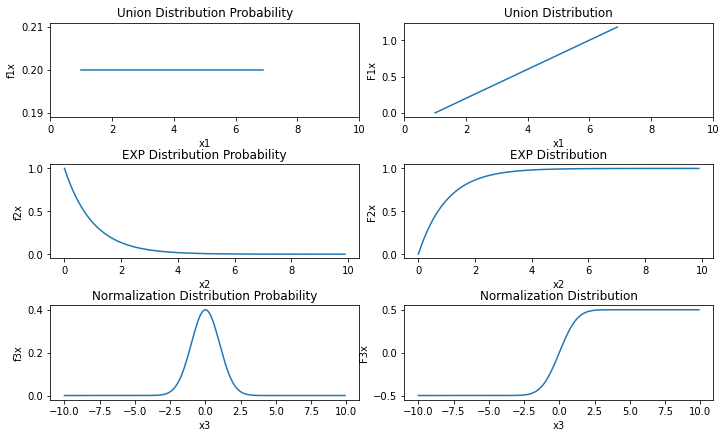

In [32]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt 

# 1. 均匀分布 U(a, b), 
a, b = 1, 6
x1 = symbols("x1")
f1x = (1 / (b - a)) 
F1x = integrate(f1x, (x1, a, x1))
# 2. 指数分布，theta = 1
theta = 1
x2 = symbols("x2")
f2x = (1/ theta) * (exp(-x2/theta)) 
F2x = integrate(f2x, (x2, 0, x2))
# 3. 正态分布 N(mu, sigma^2) ~ (0, 1), (0, 5), (2, 5)
x3 = symbols("x3")
mu1, sigma1 = 0, 1
f3x = (1/sqrt(2*pi*sigma1))*exp(-(x3 - mu1)**2 / (2*(sigma1**2)))
F3x = integrate(f3x)

# 画图 
x1_1 = [f1x for i in np.arange(1, 7, 0.1)]  # f1x的纵坐标
x1_2 = [F1x.evalf(subs={x1:i}) for i in np.arange(1, 7, step=0.1)]   # F1x的纵坐标
x2_1 = [f2x.evalf(subs={x2:i}) for i in np.arange(0, 10, 0.1)]
x2_2 = [F2x.evalf(subs={x2:i}) for i in np.arange(0, 10, 0.1)]
x3_1 = [f3x.evalf(subs={x3:i}) for i in np.arange(-10, 10, 0.1)]
x3_2 = [F3x.evalf(subs={x3:i}) for i in np.arange(-10, 10, 0.1)]

fig = plt.figure(figsize=(10, 6))
plt.subplot(3, 2, 1)
plt.plot(list(np.arange(1, 7, 0.1)), x1_1)
plt.title("Union Distribution Probability")
plt.xlabel('x1')
plt.ylabel('f1x')
plt.xlim(0, 10)
plt.subplot(3,2, 2)
plt.plot(list(np.arange(1, 7, 0.1)), x1_2)
plt.title("Union Distribution")
plt.xlabel('x1')
plt.ylabel('F1x')
plt.xlim(0, 10)
plt.subplot(3, 2, 3)
plt.plot(list(np.arange(0, 10, 0.1)), x2_1)
plt.title("EXP Distribution Probability")
plt.xlabel('x2')
plt.ylabel('f2x')
plt.subplot(3, 2, 4)
plt.plot(list(np.arange(0, 10, 0.1)), x2_2)
plt.title("EXP Distribution")
plt.xlabel('x2')
plt.ylabel('F2x')
plt.subplot(3, 2, 5)
plt.plot(list(np.arange(-10, 10, 0.1)), x3_1)
plt.title("Normalization Distribution Probability")
plt.xlabel('x3')
plt.ylabel('f3x')
plt.subplot(3, 2, 6)
plt.plot(list(np.arange(-10, 10, 0.1)), x3_2)
plt.title("Normalization Distribution")
plt.xlabel('x3')
plt.ylabel('F3x')
fig.tight_layout(pad=0.4, w_pad=0, h_pad=0)
plt.show()

[scipy.stats包中包含了统计学一些专用的概率密度函数及分布函数以及其它的功能](https://docs.scipy.org/doc/scipy/tutorial/stats.html#performance-issues-and-cautionary-remarks)，它是一个专门用来进行统计学方法调用的包

## 1.4 一维随机变量的数字特征：期望、方差、分位数与中位数

* 数学期望（均值）     
对于离散型随机变量： 设离散型随机变量${\bf{X}}$的分布律为 $$P{{\bf{X}}=x_{k}}=p_{k}, k = 1, 2, \cdots, n.$$ 若级数  $$\sum_{k=1}^{\infty}x_{k}p_{k}$$绝对收敛，则称级数$\sum_{k=1}^{\infty}x_{k}p_{k}$的和为随机变量${\bf{X}}$的**数学期望**，记为 $$E({\bf{X}})=\sum_{k=1}^{\infty}x_{k}p_{k}$$
对于连续型随机变量：设连续型随机变量${\bf{X}}$的概率密度为$f(x)$，若积分 $$\int_{-\infty}^{\infty}xf(x)dx$$绝对收敛，则称积分$\int_{-\infty}^{\infty}xf(x)dx$的值为随机变量${\bf{X}}$的**数学期望**，记为$$E({\bf{X}}) = \int_{-\infty}^{\infty}xf(x)dx$$

> 期望的几个重要性质：
> - 1.设$C$是常数，有$E(C)=C$。
> - 2.设${\bf{X}}$是一个随机变量，$C$是常数，则有$$E(C{\bf{X}})=CE({\bf{X}})$$
> - 3.设${\bf{X}}, {\bf{Y}}$是两个随机变量，则有$$E({\bf{X}+\bf{Y}}) = E({\bf{X}}) + E({\bf{Y}})$$
> - 4.设${\bf{X}}, {\bf{Y}}$是相互独立的随机变量，则有$$E({\bf{XY}})=E({\bf{X}})E({\bf{Y}})$$

> 常见分布的数学期望：
> - 1. 0-1分布：$E({\bf{X}})=p$
> - 2. 二项分布：$E({\bf{X}}) = np$
> - 3. 泊松分布：$E({\bf{X}}) = \lambda$
> - 4. 均匀分布：$E({\bf{X}}) = \frac{a+b}{2}$
> - 5. 指数分布：$E({\bf{X}}) = \frac{1}{\theta}$
> - 6. 正态分布：$E({\bf{X}}) = \mu$

* 方差和标准差  
设${\bf{X}}$是一个随机变量，若$E\{[{\bf{X}} - E({\bf{X}})]^{2}\}$存在，则称$E\{[{\bf{X}} - E({\bf{X}})]^{2}\}$为${\bf{X}}$的**方差**，记为$D({\bf{X}})或Var({\bf{X}})$，即$$D({\bf{X}})=Var({\bf{X}})=E\{[{\bf{X}} - E({\bf{X}})]^{2}\}$$ 引入$\sqrt{D({\bf{X}})}$，记为$\sigma{(\bf{X})}$，称为**标准差或均方差**。

> 方差化简计算公式：$D({\bf{X}})=E({\bf{X}}^{2}) - [E({\bf{X}})]^{2}$

> 方差的性质：
> - 1. 设$C$是常数，则$D(C)=0$
> - 2. 设$\bf{X}$是随机变量， $C$是常数，则$$D(C{\bf{X}})=C^{2}D({\bf{X}}), D({\bf{X}}+C)=D({\bf{X}})$$
> - 3. 设$\bf{X}, \bf{Y}$是两个随机变量，则有$$D({\bf{X}}+{\bf{Y}}) = D({\bf{X}})+D({\bf{Y}}) + 2E\{({\bf{X}} - E({\bf{X}}))({\bf{Y}} - E({\bf{Y}}))\}$$ 特别地，若$\bf{X}, \bf{Y}$相互独立，则有$$D({\bf{X}}+{\bf{Y}}) = D({\bf{X}})+D({\bf{Y}})$$
> - 4. $D({\bf{X}})=0$的充分必要条件是${\bf{X}}$以概率$1$取常数$E({\bf{X}})$，即$$P\{{\bf{X}} = E({\bf{X}})\} = 1$$

> 常见分布的方差：
> - 1. 0-1分布：$Var({\bf{X}}) = p(1-p)$
> - 2. 二项分布：$Var({\bf{X}}) = np(1-p)$
> - 3. 泊松分布：$Var({\bf{X}}) = \lambda$
> - 4. 均匀分布：$Var({\bf{X}}) = \frac{(b-a)^{2}}{12}$
> - 5. 正态分布：$Var({\bf{X}}) = \sigma^2$
> - 6. 指数分布：$Var({\bf{X}}) = \frac{1}{\theta^{2}}$

python代码（利用scipy.stats包计算常见分布的均值和方差）

In [38]:
import numpy as np
from scipy.stats import bernoulli  # 0 - 1 分布
from scipy.stats import binom      # 二项分布
from scipy.stats import poisson    # 泊松分布
from scipy.stats import uniform  # 均匀分布
from scipy.stats  import norm    # 正态分布
from scipy.stats import expon    # 指数分布
from scipy.stats import rv_continuous # 建立自己的分布函数

print("0 - 1 分布（p=0.5）的均值：{}, 方差： {}， 标准差：{}".format(bernoulli(p=0.5).mean(), 
                                            bernoulli(p=.5).var(), bernoulli(p=0.5).std()))
print("二项分布b(100, 0.5)的均值：{}, 方差： {}， 标准差：{}".format(binom(n=100, p=0.5).mean(), 
                                        binom(n=100, p=0.5).var(), binom(n=100, p=0.5).std()))
print("泊松分布（lambda=0.6）的均值：{}, 方差： {}， 标准差：{}".format(poisson(0.6).mean(), poisson(0.6).var(), poisson(0.6).std()))
print("均匀分布(1, 6)的均值：{}, 方差： {}， 标准差：{}".format(uniform(1, 5).mean(), uniform(1, 5).var(), uniform(1, 5).std()))
print("正态分布(0, 0.1)的均值：{}, 方差： {}， 标准差：{}".format(norm(0, 0.1).mean(), norm(0, 0.1).var(), norm(0, 0.1).std()))
print("指数分布(theta = 5)的均值：{}, 方差： {}， 标准差：{}".format(expon(scale=1.0/5.0).mean(), expon(scale=1.0/5.0).var(), expon(scale=1.0/5.0).std()))

# 利用rv_continuous创建一个自己的分布函数
class My_distribution(rv_continuous):
    def _cdf(self, x):
        return np.where(x>0., 1, 0)

example = My_distribution(name='example')
x= np.array([1, -1, 2, 3, 4, -1])
print("example(x=[1, -1, 2, 3, 4, -1])的均值：{}, 方差： {}， 标准差：{}".format(example(x).mean(), example(x).var(), example(x).std()))

0 - 1 分布（p=0.5）的均值：0.5, 方差： 0.25， 标准差：0.5
二项分布b(100, 0.5)的均值：50.0, 方差： 25.0， 标准差：5.0
泊松分布（lambda=0.6）的均值：0.6, 方差： 0.6， 标准差：0.7745966692414834
均匀分布(1, 6)的均值：3.5, 方差： 2.083333333333333， 标准差：1.4433756729740643
正态分布(0, 0.1)的均值：0.0, 方差： 0.010000000000000002， 标准差：0.1
指数分布(theta = 5)的均值：0.2, 方差： 0.04000000000000001， 标准差：0.2
example(x=[1, -1, 2, 3, 4, -1])的均值：[ 1. -1.  2.  3.  4. -1.], 方差： [2.38155178e-29 2.38155178e-29 2.38155178e-29 2.38155178e-29
 2.38155178e-29 2.38155178e-29]， 标准差：[4.88011452e-15 4.88011452e-15 4.88011452e-15 4.88011452e-15
 4.88011452e-15 4.88011452e-15]


* 分位数与中位数（连续型随机变量）  
设连续随机变量 $X$ 的分布函数为 $F(x)$，密度函数为 $p(x)$。 对任意 $p \in(0,1)$， 称满足条件
$$F\left(x_{p}\right)=\int_{-\infty}^{x_{p}} p(x) \mathrm{d} x=p$$
的 $x_{p}$ 为此分布的 $p$ **分位数**， 又称下侧 $p$ 分位数。

![](figures/08.jpg)

分位数与上侧分位数是可以相互转换的， 其转换公式为：$x_{p}^{\prime}=x_{1-p}, \quad x_{p}=x_{1-p}^{\prime}$


**中位数就是p=0.5时的分位数点**，设连续随机变量 $X$ 的分布函数为 $F(x)$， 密度函数为 $p(x)$。 称 $p=0.5$ 时的 $p$ 分位数 $x_{0.5}$ 为此分布的中位数，即 $x_{0.5}$ 满足$$F\left(x_{0.5}\right)=\int_{-\infty}^{x_{0.5}} p(x) \mathrm{d} x=0.5$$

python代码（计算标准正态分布的0.25，0.5（中位数），0.75，0.95分位数点。）

In [46]:
from scipy.stats import norm

print("标准正态分布（0，1）的0.25分位数点：{}".format(norm.ppf(0.25))) 
print("标准正态分布（0，1）的0.5分位数点：{}".format(norm.ppf(0.5)))
print("标准正态分布（0，1）的0.75分位数点：{}".format(norm.ppf(0.75)))
print("标准正态分布（0，1）的0.95分位数点：{}".format(norm.ppf(0.95)))

标准正态分布（0，1）的0.25分位数点：-0.6744897501960817
标准正态分布（0，1）的0.5分位数点：0.0
标准正态分布（0，1）的0.75分位数点：0.6744897501960817
标准正态分布（0，1）的0.95分位数点：1.6448536269514722


# 1.5 多维随机变量及其联合分布、边际分布、条件分布

* 多维随机变量：若随机变量 $X_{1}(\omega), X_{2}(\omega), \cdots, X_{n}(\omega)$ 定义在同一个基本空间 $\Omega=\{\omega\}$ 上， 则称
$$\boldsymbol{X}(\omega)=\left(X_{1}(\omega), X_{2}(\omega), \cdots, X_{n}(\omega)\right)$$
是一个多维随机变量，也称为n维随机向量。

* 多维随机变量联合分布函数：设 $X=\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 是 $n$ 维随机变量， 对任意 $n$ 个实数 $x_{1}, x_{2}, \cdots, x_{n}$ 所组成的 $n$ 个事件 $X_{1} \leqslant x_{1},X_{2} \leqslant x_{2} , \cdots, X_{n} \leqslant x_{n} $ 同时发生的概率
$$F\left(x_{1}, x_{2}, \cdots, x_{n}\right)=P\left(X_{1} \leqslant x_{1}, X_{2} \leqslant x_{2}, \cdots, X_{n} \leqslant x_{n}\right)$$
称为 $n$ 维随机变量 $\boldsymbol{X}$ 的**联合分布函数**。

*  多维随机变量联合概率密度函数：设$n$维随机变量 $X=\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 的分布函数为 $F(x_{1}, x_{2}, \cdots, x_{n})$ 。假如各分量 $x_{1}, x_{2}, \cdots, x_{n}$ 都是一维连续随机变量，并存在定义在空间上的非负函数 $p(x_{1}, x_{2}, \cdots, x_{n})$，使得
$$F(x, y)=\int_{-\infty}^{x_{1}} \int_{-\infty}^{x_{2}}\cdots \int_{-\infty}^{x_{n}} p(x_{1}, x_{2}, \cdots, x_{n}) d x_{1}dx_{2}\cdots dx_{n}$$
则称 $X=\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 为$n$维连续随机变量，$p(x_{1}, x_{2}, \cdots, x_{n})$ 称为 $X=\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 的**联合概率密度函数**， 或简称联合密度。

* 特例：**二维随机变量**    
二维随机变量的分布函数：设$(X, Y)$是二维随机变量，对于任意实数$x, y$，二元函数：
$$F(x, y)=P\{X\le x, Y \le y\}$$ 
称为二维随机变量$(X, Y)$的**分布函数**，或称为随机变量$(X, Y)$的**联合分布函数**。

> 分布函数的性质：
> - 1. $F(x, y)$是$x, y$的不减函数
> - 2. $0 \le F(x, y) \le 1$，且$$\begin{aligned}&对于任意固定的y, F(-\infty, y) = 0\\&对于任意固定的x, F(x, -\infty)=0\\&F(-\infty, -\infty)=0, F(\infty, \infty)=1\end{aligned}$$
> - 3. $F(x+0, y)=F(x, y), F(x, y+0)=F(x, y)$，即$F(x, y)$关于$x, y$分别右连续
> - 4. 对于任意的$(x_{1}, y_{1}), (x_{2}, y_{2}), x_{1} < x_{2}, y_{1} < y_{2}$，有不等式$$F(x_{2},y_{2}) - F(x_{2}, y_{1}) + F(x_{1}, y_{1}) - F(x_{1}, y_{2}) \ge 0$$恒成立

&emsp;&emsp;二维随机变量的概率密度函数：对于二维随机变量$(X, Y)$的分布函数$F(x, y)$，如果存在非负可积函数$f(x, y)$，使对于任意$x, y$有
$$F(x, y) = \int_{-\infty}^{y}\int_{-\infty}^{x}f(u, v)dudv$$ 
则称$(X, Y)$是连续型的二维随机变量，函数$f(x, y)$称为二维随机变量$(X, Y)$的概率密度，或称为随机变量$X和Y$的联合概率密度。

> 联合概率密度$f(x, y)$的性质：
> - 1. $f(x, y) \ ge 0$ 
> - 2. $\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(x, y)dxdy = 1$
> - 3. 若$f(x, y)$在点$(x, y)$连续，则有$$\frac{\partial^{2} F(x, y)}{\partial x\partial y} = f(x, y)$$
> - 4. 设$G$是$xOy$平面上的区域，点$(X, Y)$落在$G$内的概率为：$$P\{(X, Y) \in G\} = \iint\limits_{G}f(x, y)dxdy$$

python代码（绘制二维概率密度函数图像）[代码参考](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal)

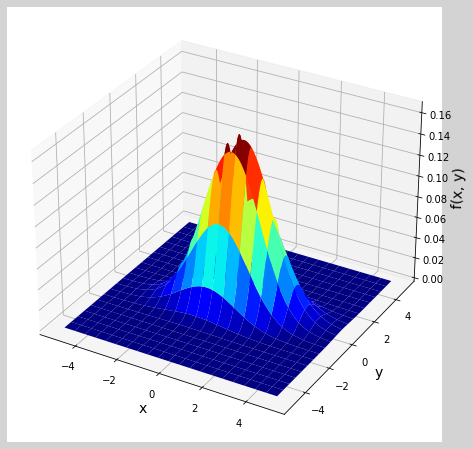

C:\Users\13541\AppData\Local\Temp\ipykernel_11684\2054532681.py:21: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride'
  ax2.contourf(x, y, rv.pdf(pos), rstride=50, cstride=50, cmap='jet')


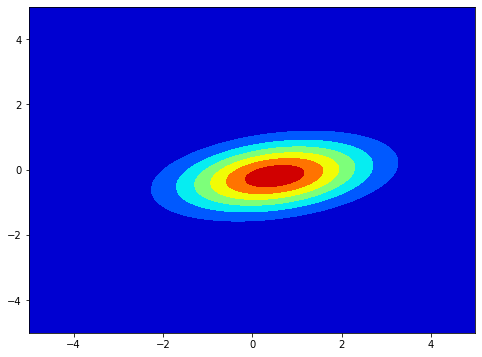

In [61]:
import numpy as np
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

x, y = np.mgrid[-5:5:0.01, -5:5:0.01]
pos = np.dstack((x, y))
rv = stats.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
z = rv.pdf(pos)
# 曲面图
plt.figure('Surface', facecolor='lightgray', figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('f(x, y)', fontsize = 14)
ax.plot_surface(x, y, z, rstride=50, cstride=50, cmap='jet')
plt.show()
# 等高线图
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos), rstride=50, cstride=50, cmap='jet')
plt.show()

* 边际（边缘）分布：  
二维随机变量$(X, Y)$作为一个整体，具有分布函数$F(x, y)$，$X和Y$都是随机变量，他们也有自己的分布函数，分别记为$F_{X}(x), F_{Y}(y)$，依次为随机变量$(X, Y)$关于$X$和关于$Y$的**边缘分布函数** $$F_{X}(x)=P\{X\le x\}=P\{X\le x, Y < \infty\}=F(x, \infty)$$即$F_{X}(x)=F(x, \infty)$，同理$$F_{Y}(y)=F(\infty, y)$$
对于连续型随机变量$(X, Y)$，设它的概率密度函数为$f(x, y)$，由于 $$F_{X}(x)=F(x, \infty)=\int_{-\infty}^{x}[\int_{-\infty}^{\infty}f(x, y)dy]dx$$则随机变量$X$的**概率密度函数**为：$f_{X}(x)=\int_{-\infty}^{\infty}f(x, y)dy$  
同理，随机变量$Y$的**概率密度函数**为：$f_{Y}(y)=\int_{-\infty}^{\infty}f(x, y)dx$

python代码（已知联合分布求边缘分布）

In [64]:
from sympy import *

x, y = symbols('x, y')
fxy = 1
pxy = Piecewise((fxy, And(x > 0, x < 1, y > -x, y < x)), (0, True))
fXx = integrate(pxy, (y, -oo, oo))
pprint("关于随机变量X的边缘密度函数为：{}".format(fXx))
fYy = integrate(pxy, (x, -oo, oo))
pprint("关于随机变量Y的边缘密度函数为：{}".format(fYy))

关于随机变量X的边缘密度函数为：Piecewise((x + Max(-x, x), (x > 0) & (x < 1)), (0, True))
关于随机变量Y的边缘密度函数为：-Max(0, -y, y) + Max(1, -y, y)


&emsp;&emsp;**边际（边缘）分布列**：在二维离散随机变量 $(X, Y)$ 的联合分布列 $\left\{P\left(X=x_{i}, Y=y_{j}\right)\right\}$ 中， 对 $j$ 求和所得的分布列$$\sum_{j=1}^{\infty} P\left(X=x_{i}, Y=y_{j}\right)=P\left(X=x_{i}\right), \quad i=1,2, \cdots$$ 
&emsp;&emsp;被称为 $X$ 的边际分布列。 类似地， 对 $i$ 求和所得的分布列 $$\sum_{i=1}^{\infty} P\left(X=x_{i}, Y=y_{j}\right)=P\left(Y=y_{j}\right), \quad j=1,2, \cdots$$ 
&emsp;&emsp;被称为 $Y$ 的边际分布列。

* 条件分布：由条件概率引出条件概率分布。     
设$(X, Y)$是二维离散型随机变量，其分布律为$$P\{X=x_{i}, Y=y_{j}\}=p_{ij}, i,j=1,2,\cdots .$$ $(X, Y)$关于$X$和关于$Y$的边缘分布分别为
$$\begin{aligned}& P\{X=x_{i}\}=p_{i}=\sum_{j=1}^{\infty}p_{ij}, i=1,2,\cdots .\\&P\{Y=y_{j}\}=p_{j}=\sum_{i=1}^{\infty}p_{ij}, j=1,2,\cdots . \end{aligned}$$
设$P_{\cdot j} > 0$，考虑在事件$\{Y=y_{j}\}$已发生的条件下事件$\{X=x_{i}\}$发生的概率，由条件概率公式得$$P\{X=x_{i}|Y=y_{j}\} = \frac{P\{X=x_{i}, Y=y_{j}\}}{P\{Y=y_{j}\}} = \frac{p_{ij}}{p_{\cdot j}}, i=1,2,\cdots .$$上式称为在$Y=y_{j}$条件下随机变量$X$得**条件分布率**，同理$$P\{Y=y_{j}|X=x_{i}\} = \frac{P\{Y=y_{j}, X=x_{i}\}}{P\{X=x_{i}\}} = \frac{p_{ij}}{p_{i \cdot}}, i=1,2,\cdots .$$称为在$X=x_{i}$条件下随机变量$Y$得**条件分布率**

> 条件分布得性质：
> - 1. $$P\{X=x_{i}|Y=y_{j}\} \ge 0$$
> - 2. $$\sum_{i=1}^{\infty}P\{X=x_{i}|Y=y_{j}\} = \sum_{i=1}^{\infty}\frac{p_{ij}}{p_{\cdot j}} =\frac{1} {p_{\cdot j}}\sum_{i=1}^{\infty}p_{ij} = \frac{p_{\cdot j}}{p_{\cdot j}} = 1$$

&emsp;&emsp;连续型随机变量条件分布：    
设二维随机变量$(X, Y)$得概率密度为$f(x, y)$，$(X, Y)$关于$Y$得边缘概率密度为$f_{Y}(y)$. 若对于固定得$y, f_{Y}(y) > 0$，则称$\frac{f(x, y)}{f_{Y}(y)}$为在$Y = y$条件下$X$的**条件概率密度函数**，记为
$$f_{X|Y}(x|y) = \frac{f(x, y)}{f_{Y}(y)}$$
称$\int_{-\infty}^{x}f_{X|Y}(x|y)dx = \int_{-\infty}^{x}\frac{f(x, y)}{f_{Y}(y)}dx$为在$Y = y$条件下$X$的**条件分布函数**，记为$P\{X\le x|Y =y\}或F_{X|Y}(x|y)$，即
$$F_{X|Y}(x|y)=P\{X\le x|Y =y\}=\int_{-\infty}^{x}\frac{f(x, y)}{f_{Y}(y)}dx.$$

> 连续随机变量的贝叶斯公式和全概率公式：
> - 1. 全概率公式$$\begin{aligned}&p_{Y}(y)=\int_{-\infty}^{\infty} p_{X}(x) p(y \mid x) \mathrm{d} x, \\&p_{\chi}(x)=\int_{-\infty}^{\infty} p_{Y}(y) p(x \mid y) \mathrm{d} y .\end{aligned}$$
> - 2. 贝叶斯公式$$\begin{aligned}&p(x \mid y)=\frac{p_{X}(x) p(y \mid x)}{\int_{-\infty}^{\infty} p_{X}(x) p(y \mid x) \mathrm{d} x},\\&p(y \mid x)=\frac{p_{Y}(y) p(x \mid y)}{\int_{-\infty}^{\infty} p_{Y}(y) p(x \mid y) \mathrm{d} y} .\end{aligned}$$

python代码(求解边际分布列)：设在一段时间内进人某一商店的顾客人数 $X$ 服从泊松分布 $P(\lambda)$， 每个顾客购买某种物品的概率为 $p$, 并且各个顾客是否购买该种物品相互独立， 求进入商店的顾客购买这种物品的人数 $Y$ 的分布列。

In [76]:
from sympy import *
from sympy.abc import lamda, k, m, x, y, p    # 代替symbols("lamda, k, m, x, y") 
Pxk = (lamda ** k * exp(- lamda)) / factorial(k)
print("进入商店人数(k)的概率分布P(X=k) = {}".format(Pxk))
Pyx = (factorial(k) / (factorial(m) * factorial(k-m))) * (p ** m) * ((1 - p) ** (k - m))
print("在进入商店人数（k）确定的条件下，客户买某种商品人数的条件分布P(Y=m|X =k)={}".format(Pyx))
f = Pxk * Pyx
Py = summation(f, (k, m, oo))
print("进入商店的顾客购买这种商品人数Y的分布列P(Y=m)={}".format(Py))
Py

进入商店人数(k)的概率分布P(X=k) = lamda**k*exp(-lamda)/factorial(k)
在进入商店人数（k）确定的条件下，客户买某种商品人数的条件分布P(Y=m|X =k)=p**m*(1 - p)**(k - m)*factorial(k)/(factorial(m)*factorial(k - m))
进入商店的顾客购买这种商品人数Y的分布列P(Y=m)=lamda**m*p**m*exp(-lamda)*exp(-lamda*(p - 1))/factorial(m)


lamda**m*p**m*exp(-lamda)*exp(-lamda*(p - 1))/factorial(m)

## 1.6 多维随机变量的数字特征：期望向量、协方差与协方差矩阵、相关系数与相关系数矩阵

* 期望向量   
记 $n$ 维随机向量为 $\boldsymbol{X}=\left(X_{1}, X_{2}, \cdots, X_{n}\right)^{T}$, 若其每个分量的数学期望都存在， 则称
$$E(\boldsymbol{X})=\left(E\left(X_{1}\right), E\left(X_{2}\right), \cdots, E\left(X_{n}\right)\right)^{T}$$
为 $n$ 维随机向量 $\boldsymbol{X}$ 的数学期望向量（一般为列向量）， 简称为 $\boldsymbol{X}$ 的数学期望。

* 协方差与协方差矩阵   
&emsp;&emsp;协方差：$\operatorname{Cov}(X, Y)=E[(X-E(X))(Y-E(Y))]$  ，衡量的是两个随机变量之间的相互关联的程度
1. 当 $\operatorname{Cov}(X, Y)>0$ 时， 称 $X$ 与 $Y$ 正相关， 这时两个偏差 $(X-E(X))$ 与 $(Y-E(Y))$ 有**同时增加或同时减少的倾向**。 由于 $E(X)$ 与 $E(Y)$ 都是常数， 故等价于 $X$ 与 $Y$ 有同时增加或同时减少的倾向。
2. 当 $\operatorname{Cov}(X, Y)<0$ 时， 称 $X$ 与 $Y$ 负相关, 这时**有 $X$ 增加而 $Y$ 减少的倾向， 或有 $Y$ 增加而 $X$ 减少的倾向**。
3. 当 $\operatorname{Cov}(X, Y)=0$ 时，称 $X$ 与 $Y$ 不相关。 这时可能由两类情况导致:一类是 $X$ 与 $Y$ 的取值毫无关联， 另一类是 $X$ 与 $Y$ 间存有某种非线性关系。

> 协方差$\operatorname{Cov}(X, Y)$的性质：
> - 1. $\operatorname{Cov}(X, Y)=E(X Y)-E(X) E(Y)$
> - 2. 若随机变量 $X$ 与 $Y$ 相互独立， 则 $\operatorname{Cov}(X, Y)=0$， 反之不成立。
> - 3. （最重要）对任意二维随机变量 $(X, Y)$， 有$$\operatorname{Var}(X \pm Y)=\operatorname{Var}(X)+\operatorname{Var}(Y) \pm 2 \operatorname{Cov}(X, Y)$$ 该性质表明: 在 $X$ 与 $Y$ 相关的场合,和的方差不等于方差的和。 $X$ 与 $Y$ 的正相关会增加和的方差,负相关会减少和的方差，而在 $X$ 与 $Y$ 不相关的场合，和的方差等于方差的和，即：**若 $X$ 与 $Y$ 不相关**， 则 $\operatorname{Var}(X \pm Y)=\operatorname{Var}(X)+\operatorname{Var}(Y)$。
> - 4. 协方差 $\operatorname{Cov}(X, Y)$ 的计算与 $X, Y$ 的次序无关， 即 $$\operatorname{Cov}(X, Y)=\operatorname{Cov}(Y, X) $$
> - 5. 任意随机变量 $X$ 与常数 $a$ 的协方差为零，即 $$\operatorname{Cov}(X, a)=0$$
> - 6. 对任意常数 $a, b$， 有 $$\operatorname{Cov}(a X, b Y)=a b \operatorname{Cov}(X, Y) $$
> - 7. 设 $X, Y, Z$ 是任意三个随机变量,则 $$\operatorname{Cov}(X+Y, Z)=\operatorname{Cov}(X, Z)+\operatorname{Cov}(Y, Z)$$

🔥例题：设随机变量$(X, Y)$既有概率密度
$$
f(x, y)= \left \{
\begin{aligned}
     &\frac{1}{8}(x+y) ,  &0 \le x \le 2, 0 \le y \le 2\\
     &0,   &其它
\end{aligned}
    \right.
$$
求$E(X), E(Y), E(XY), Cov(X, Y), D(X+Y)$

✨解：
$$
\begin{aligned}
&E(X) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}xf(x, y)dxdy \\
&E(Y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}yf(x, y)dxdy  \\
&E(XY) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}xyf(x, y)dxdy   \\
&Cov(X, Y) = E(XY) - E(X)E(Y)       \\
&D(X+Y) = D(X) + D(Y) + 2Cov(X, Y) = E(X^{2}) - [E(X)]^{2} + E(Y^{2}) - [E(Y)]^{2} + 2Cov(X, Y)
\end{aligned}
$$

python代码(求解例题)

In [77]:
from sympy import *
from sympy.abc import x, y 
f = (1 / 8) * (x + y)
fxy = Piecewise((f, And(x >= 0, x <= 2, y >= 0, y <= 2)), (0, True))
Ex = integrate(x * fxy, (x, -oo, oo), (y, -oo, oo))
print("E(X) = {}".format(Ex))
Ey = integrate(y * fxy, (x, -oo, oo), (y, -oo, oo))
print("E(Y) = {}".format(Ey))
Exy = integrate(x * y * fxy, (x, -oo, oo), (y, -oo, oo))
print("E(XY) = {}".format(Exy))
cov_xy = Exy - Ex * Ey 
print("Cov(X, Y) = {}".format(cov_xy))
Ex_2 = integrate(x ** 2 * fxy, (x, -oo, oo), (y, -oo, oo))
Ey_2 = integrate(y ** 2 * fxy, (x, -oo, oo), (y, -oo, oo))
Dx_y = Ex_2 - (Ex ** 2) + Ey_2 - (Ey ** 2) + 2 * cov_xy
print("D(X + Y) = {}".format(Dx_y))

E(X) = 1.16666666666667
E(Y) = 1.16666666666667
E(XY) = 1.33333333333333
Cov(X, Y) = -0.0277777777777775
D(X + Y) = 0.555555555555557


&emsp;&emsp;协方差矩阵：设$n$ 维随机向量为 $\boldsymbol{X}=\left(X_{1}, X_{2}, \cdots, X_{n}\right)^{\prime}$的期望向量为：
$$
E(\boldsymbol{X})=\left(E\left(X_{1}\right), E\left(X_{2}\right), \cdots, E\left(X_{n}\right)\right)^{T}
$$
则
$$
\begin{aligned}
& E\left[(\boldsymbol{X}-E(\boldsymbol{X}))(\boldsymbol{X}-E(\boldsymbol{X}))^{T}\right] \\
=&\left(\begin{array}{cccc}
\operatorname{Var}\left(X_{1}\right) & \operatorname{Cov}\left(X_{1}, X_{2}\right) & \cdots & \operatorname{Cov}\left(X_{1}, X_{n}\right) \\
\operatorname{Cov}\left(X_{2}, X_{1}\right) & \operatorname{Var}\left(X_{2}\right) & \cdots & \operatorname{Cov}\left(X_{2}, X_{n}\right) \\
\vdots & \vdots & & \vdots \\
\operatorname{Cov}\left(X_{n}, X_{1}\right) & \operatorname{Cov}\left(X_{n}, X_{2}\right) & \cdots & \operatorname{Var}\left(X_{n}\right)
\end{array}\right)
\end{aligned}
$$
称为该随机向量的方差-协方差矩阵，简称协方差阵，记为 $\operatorname{Cov}(\boldsymbol{X})$。
> 🦊注：$n$ 维随机向量的协方差矩阵 $\operatorname{Cov}(\boldsymbol{X})=\left(\operatorname{Cov}\left(X_{i}, X_{j}\right)\right)_{n \times n}$ 是一个**对称的非负定矩阵**。

python代码（求上一例题的协方差矩阵）

In [78]:
from sympy import *
from sympy.abc import x, y 
f = (1 / 8) * (x + y)
fxy = Piecewise((f, And(x >= 0, x <= 2, y >= 0, y <= 2)), (0, True))
Ex = integrate(x * fxy, (x, -oo, oo), (y, -oo, oo))
Ey = integrate(y * fxy, (x, -oo, oo), (y, -oo, oo))
Exy = integrate(x * y * fxy, (x, -oo, oo), (y, -oo, oo))

cov_xy = Exy - Ex * Ey 
var_x = Ex_2 - (Ex ** 2)
var_y = Ey_2 - (Ey ** 2)
Matrix([[var_x, cov_xy], [cov_xy, var_y]])

Matrix([
[  0.305555555555556, -0.0277777777777775],
[-0.0277777777777775,   0.305555555555556]])

* 相关系数与相关系数矩阵    
&emsp;&emsp;相关系数：设 $(X, Y)$ 是一个二维随机变量， 且 $\operatorname{Var}(X)=\sigma_{X}^{2}>0, \operatorname{Var}(Y)=\sigma_{Y}^{2}>0$.则称
$$
\operatorname{Corr}(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X)} \sqrt{\operatorname{Var}(Y)}}=\frac{\operatorname{Cov}(X, Y)}{\sigma_{X} \sigma_{Y}}
$$
为 $X$ 与 $Y$ 的 **(线性)** 相关系数，记为$\rho_{xy}或Corr(X, Y)$。


> 相关系数$\rho_{x, y}$的性质：
> - 1. $ -1 \leqslant \operatorname{Corr}(X, Y) \leqslant 1$， 或 $|\operatorname{Corr}(X, Y)| \leqslant 1$。
> - 2. $\operatorname{Corr}(X, Y)=\pm 1$ 的充要条件是 $X$ 与 $Y$ 间几乎处处有线性关系, 即存 在 $a(\neq 0)$ 与 $b$， 使得$$P(Y=a X+b)=1$$
> - 3. 相关系数 $\operatorname{Corr}(X, Y)$ 刻画了 $X$ 与 $Y$ 之间的线性关系强弱， 因此也常称其为 “线性相关系数”。
> - 4.  若 $\operatorname{Corr}(X, Y)=0$， 则称 $X$ 与 $Y$ 不相关。不相关是指 $X$ 与 $Y$ 之间没有线性关系， 但 $X$ 与 $Y$ 之间可能有其他的函数关系， 譬如平方关系、对数关系等。
> - 5. 若 $\operatorname{Corr}(X, Y)=1$， 则称 $X$ 与 $Y$ 完全正相关； 若 $\operatorname{Corr}(X, Y)=-1$， 则称 $X$ 与 $Y$ 完全负相关。
> - 6. 若 $0<|\operatorname{Corr}(X, Y)|<1$， 则称 $X$ 与 $Y$ 有 “一定程度” 的线性关系。 $|\operatorname{Corr}(X, Y)|$ 越接近于 1， 则线性相关程度越高； $|\operatorname{Corr}(X, Y)|$ 越接近于 0 ， 则线性相关程度越低。 而协方差看不出这一点， 若协方差很小， 而其两个标准差 $\sigma_{X}$ 和 $\sigma_{Y}$ 也很小， 则其比值就不一定很小。

&emsp;&emsp;相关系数矩阵：类似于协方差矩阵，相关系数矩阵就是把协方差矩阵中每个元素替换成相关系数，具体来说就是：
$$
\begin{aligned}
& \operatorname{Corr}(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X)} \sqrt{\operatorname{Var}(Y)}}=\frac{\operatorname{Cov}(X, Y)}{\sigma_{X} \sigma_{Y}} \\
=&\left(\begin{array}{cccc}
1 & \operatorname{Corr}\left(X_{1}, X_{2}\right) & \cdots & \operatorname{Corr}\left(X_{1}, X_{n}\right) \\
\operatorname{Corr}\left(X_{2}, X_{1}\right) & 1 & \cdots & \operatorname{Corr}\left(X_{2}, X_{n}\right) \\
\vdots & \vdots & & \vdots \\
\operatorname{Corr}\left(X_{n}, X_{1}\right) & \operatorname{Corr}\left(X_{n}, X_{2}\right) & \cdots & 1
\end{array}\right)
\end{aligned}
$$

python代码（求上一例题的相关系数矩阵）

In [79]:
from sympy import *
from sympy.abc import x, y 
f = (1 / 8) * (x + y)
fxy = Piecewise((f, And(x >= 0, x <= 2, y >= 0, y <= 2)), (0, True))
Ex = integrate(x * fxy, (x, -oo, oo), (y, -oo, oo))
Ey = integrate(y * fxy, (x, -oo, oo), (y, -oo, oo))
Exy = integrate(x * y * fxy, (x, -oo, oo), (y, -oo, oo))

cov_xy = Exy - Ex * Ey 
var_x = Ex_2 - (Ex ** 2)
var_y = Ey_2 - (Ey ** 2)
Matrix([[1, cov_xy/(var_x * var_y)], [cov_xy/(var_x * var_y), 1]])

Matrix([
[                 1, -0.297520661157021],
[-0.297520661157021,                  1]])

## 1.7 随机变量序列的收敛状态：依概率收敛、依分布收敛

* 依概率收敛：设 $\left\{X_{n}\right\}$ 为一随机变量序列， $X$ 为一随机变量， 如果对任意的 $\varepsilon>0$， 有
$$
P\left(\left|X_{n}-X\right| \geqslant \varepsilon\right) \rightarrow 0(n \rightarrow \infty)
$$
则称序列 $\left\{X_{n}\right\}$ 依概率收敛于 $X$， 记作 $X_{n} \stackrel{P}{\longrightarrow} X$。

依概率收玫的含义是： $X_{n}$ 对 $X$ 的绝对偏差不小于任一给定量的可能性将随着 $n$增大而愈来愈小。或者说， 绝对偏差 $\left|X_{n}-X\right|$ 小于任一给定量的可能性将随着 $n$ 增大而愈来愈接近于 1 , 即$P\left(\left|X_{n}-X\right| \geqslant \varepsilon\right) \rightarrow 0(n \rightarrow \infty)$等价于
$$
P\left(\left|X_{n}-X\right|<\varepsilon\right) \rightarrow 1 \quad(n \rightarrow \infty) 
$$
特别当 $X$ 为退化分布时， 即 $P(X=c)=1$（像概率p就是一个案例，频率不断趋近于一个常数p，这个p就是概率）， 则称序列 $\left\{X_{n}\right\}$ 依概率收敛于 $c$， 即 $X_{n} \stackrel{P}{\longrightarrow} c$。
> 依概率收敛性质：设$X_{n} \stackrel{P}{\longrightarrow}a, Y_{n} \stackrel{P}{\longrightarrow}{b}$，又设函数$g(x, y)$在点$(a, b)$连续，则$$g(X_{n}, Y_{n}) \stackrel{P}{\longrightarrow} g(a, b)$$

* 依分布收敛：设随机变量 $X, X_{1}, X_{2}, \cdots$ 的分布函数分别为 $F(x), F_{1}(x), F_{2}(x), \cdots$。 若对 $F(x)$ 的任一**连续点** $x$， 都有
$$
\lim _{n \rightarrow \infty} F_{n}(x)=F(x)
$$
则称 $\left\{F_{n}(x)\right\}$ **弱收敛**于 $F(x)$， 记作
$$
F_{n}(x) \stackrel{W}{\longrightarrow} F(x) 
$$
也称相应的随机变量序列 $\left\{X_{n}\right\}$ 按分布收敛于 $X$， 记作
$$
X_{n} \stackrel{L}{\longrightarrow} X
$$

> 注：依概率收敛可推出依分布收敛，反之不成立。

## 1.8 大数定律

大数定律是叙述随机变量序列的前一些项的算数平均值在某种条件下收敛到这些项的均值的算数平均值。

&emsp;&emsp;**（弱大数）辛钦大数定理**：设$X_{1}, X_{2}, \cdots$是相互独立，服从同一分布的随机变量序列，且$X_{i}, i = 1, 2, \cdots$的数学期望存在，作前$n$个变量的算数平均$\overline{X} = \frac{1}{n} \sum_{k =1}^{n} X_{k}$, 则对于任意的$\varepsilon > 0$，有
$$
\lim_{n \rightarrow \infty} P\{\left| \frac{1}{n} \sum_{k =1}^{n} X_{k} - \frac{1}{n} \sum_{k =1}^{n} E(X_{k}) \right| < \varepsilon\} = \lim_{n \rightarrow \infty} P\{\left| \overline{X} - \overline{E(X)}\right| < \varepsilon\}=1
$$
即 $\overline{X} \stackrel{P} \longrightarrow \overline{E(X)}$，若随机变量序列具有数学期望$E(X_{k}) = \mu (k = 1, 2, \cdots)$，则上式变为
$$
\lim_{n \rightarrow \infty} P\{\left| \frac{1}{n} \sum_{k =1}^{n} X_{k} - \mu \right| < \varepsilon\} = \lim_{n \rightarrow \infty} P\{\left| \overline{X} - \mu \right| < \varepsilon\} = 1
$$
即 $\overline{X} \stackrel{P} \longrightarrow \mu$。

&emsp;&emsp;**伯努利大数定理**：设$f_{A}$是$n$次独立重复实验中事件$A$发生的次数，$p$是事件$A$在每次试验中发生的概率，则对于任意正数$\varepsilon > 0$，有
$$
\lim_{n \rightarrow \infty} P\{\left| \frac{f_{A}}{n} - p \right | < \varepsilon \} = 1
$$
或
$$
\lim_{n \rightarrow \infty} P\{\left| \frac{f_{A}}{n} - p \right | \ge \varepsilon \} = 0
$$
即 $\frac{f_{A}}{n} \stackrel{P}{\longrightarrow} p$。

> 💡大数定理的条件：独立重复事件、重复次数足够多。

🔥例：使用蒙特卡洛模拟法求定积分

设 $0 \leqslant f(x) \leqslant 1$, 求 $f(x)$ 在 区间 $[0,1]$ 上的积分值
$$
J=\int_{0}^{1} f(x) \mathrm{d} x
$$
🦊解:在正方形$\{0 \leqslant x \leqslant 1,0 \leqslant y \leqslant 1\}$内均匀地投点$(x_i,y_i)$，投n个点，点越多越好。如果某个点$y_i \le f(x_i)$,则认为事件发生，我们计算满足$y_i \le f(x_i)$点的个数$S_n$，使用大数定律：频率稳定于概率，即：$\frac{S_n}{n}$就是积分值。

python代码（求解例题）

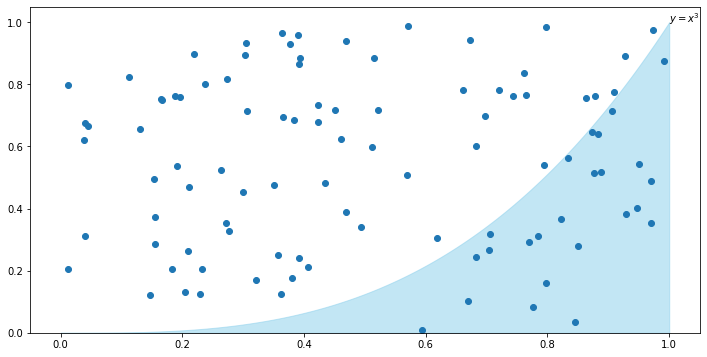

函数y = x^3 的积分值为：0.25
蒙特卡洛方法(模拟10次)计算的结果为：0.2
蒙特卡洛方法(模拟100次)计算的结果为：0.25
蒙特卡洛方法(模拟1000次)计算的结果为：0.247
蒙特卡洛方法(模拟10000次)计算的结果为：0.2521


In [100]:
from scipy import integrate
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt 
from random import choice

# 蒙特卡洛原理：将待积分函数看作是某个概率密度分布函数，根据分布函数的定义，那么对函数的积分就转化为求概率的过程。
x_arr = np.linspace(0, 1, 1000)
y_arr = x_arr ** 3

x_n = uniform.rvs(size=100)   
y_n = uniform.rvs(size=100)
plt.figure(figsize=(12, 6))
plt.stackplot(x_arr, y_arr, alpha=0.5, color='skyblue')
plt.scatter(x_n, y_n)
plt.text(1.0, 1.0, r'$y = x^3$')
plt.show()

class Montecarlo():
    def __init__(self, n):
        self.n = n    # 模拟的次数
        self.fn = 0 
    def solve(self, x, y, f):
        for i in range(self.n):
            a = choice(x)
            b = choice(y)
            if f(a) >= b:
                self.fn += 1
            else:
                continue
        res = self.fn / self.n
        print("蒙特卡洛方法(模拟{}次)计算的结果为：{}".format(self.n, res))

# 求解y = x^3 在区间[0, 1]上的积分值
x_1 = np.linspace(0, 1, 1000)
y_1 = np.linspace(0, 1, 1000)
def f(x):
    return x ** 3
int_f = integrate.quad(f, 0, 1)
print("函数y = x^3 的积分值为：{}".format(int_f[0]))
monte_10 = Montecarlo(10)
monte_10.solve(x_1, y_1, f)
monte_100 = Montecarlo(100)
monte_100.solve(x_1, y_1, f)
monte_1000 = Montecarlo(1000)
monte_1000.solve(x_1, y_1, f)
monte_10000 = Montecarlo(10000)
monte_10000.solve(x_1, y_1, f)

## 1.9 中心极限定理

中心极限定理确定在什么条件下，大量随机变量之和的分布逼近于正态分布。

&emsp;&emsp;**独立同分布的中心极限定理**：设随机变量$X_{1}, X_{2}, \cdots, X_{n}, \cdots$相互独立，服从同一分布，且具有数学期望和方差：$E(X_{k}) = \mu, D(X_{k}) = \sigma ^{2} (k = 1, 2, \cdots)$，则随机变量之和$\sum_{k=1}^{n}X_{k}$的标准化变量
$$
Y_{n} = \frac{\sum_{k=1}^{n}X_{k} - E(\sum_{k=1}^{n}X_{k})}{\sqrt{D(\sum_{k=1}^{n}X_{k})}} = \frac{\sum_{k=1}^{n}X_{k} - n\mu}{\sqrt{n}\sigma}
$$
的分布函数$F_{n}(x)$对于任意$x$满足
$$
\begin{aligned}
\lim_{n \rightarrow \infty}F_{n}(X)
 &= \lim_{n \rightarrow \infty}P\left \{ \frac{\sum_{k=1}^{n}X_{k} - n\mu}{\sqrt{n}\sigma} \le x \right \}  \\
 &= \int_{-\infty}^{x} \frac{1}{\sqrt{2 \pi}} e^{- t^{2}/ 2}dt  \\
 &= \Phi (x)
\end{aligned}
$$
即 $Y_{n} \sim N(n\mu, \sigma^{2})$或$\overline{X} \sim N(\mu, \sigma^{2}/n)$或$\frac{\overline{X} - \mu}{\sigma / \sqrt{n}} \sim N(0, 1)$。

python代码（验证独立同分布的中心极限定理）

In [137]:
from sympy import * 
from scipy.stats import norm       # 正态分布
from scipy.stats import expon      # 指数分布
from scipy.stats import uniform     # 均匀分布
from scipy.stats import poisson     # 泊松分布
import scipy.stats as ss           # 0-1 分布(前文有重名的变量名，不便直接引入)  from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import random

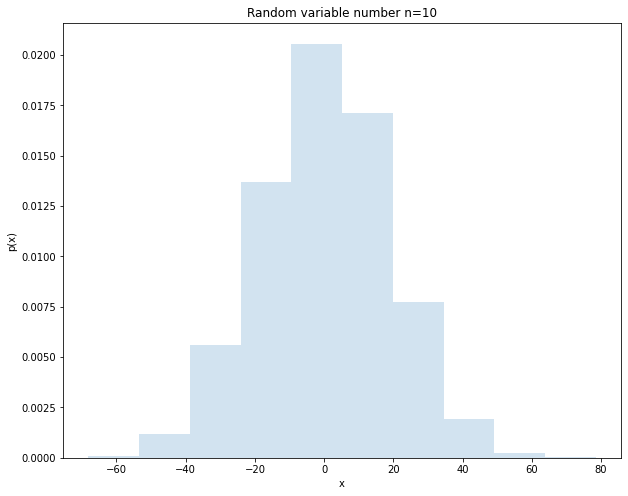

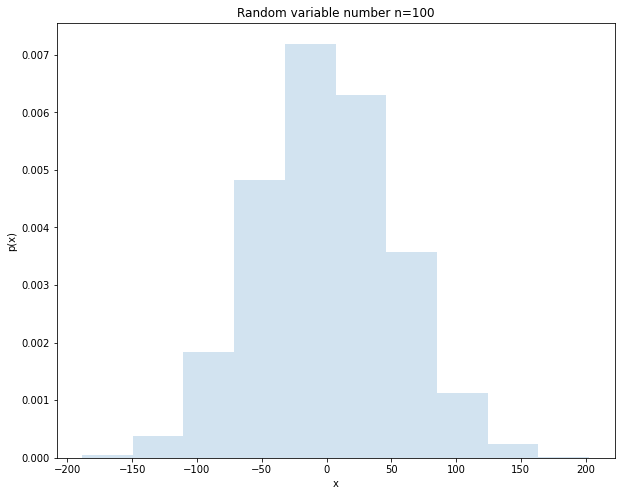

In [107]:
# 1. n个服从正态分布随机变量的和 的分布

def norm_sum(mu, sigma, n, x_size):
    X = 0
    for i in range(n):
        x_i = norm(loc=mu[i], scale=sigma[i]).rvs(size=x_size)
        X += x_i
    plt.figure(figsize=(10, 8))    
    plt.hist(X, density=True, histtype='stepfilled', alpha=0.2)
    plt.title("Random variable number n={}".format(str(n)))
    plt.xlabel("x")
    plt.ylabel("p(x)")
    plt.show()

x_size = 10000
mu = np.zeros(x_size)
sigma = np.random.randint(0, 10, x_size)
norm_sum(mu, sigma, 10, x_size)
norm_sum(mu, sigma, 100, x_size)

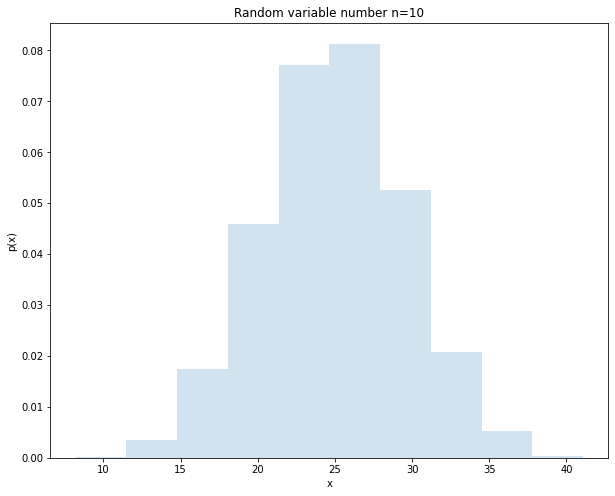

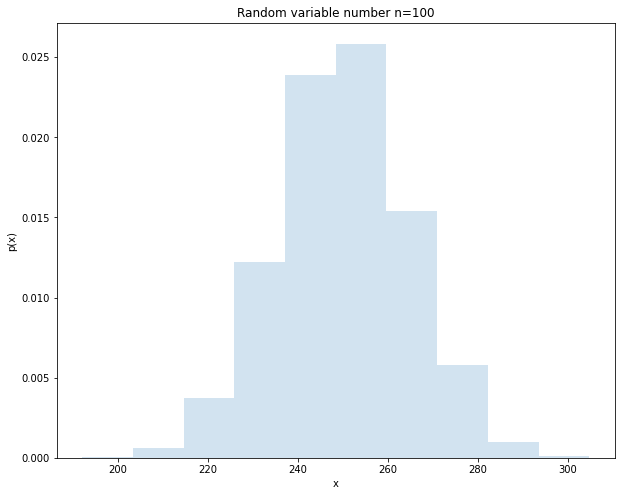

In [126]:
# 2. n个服从均匀分布随机变量的和 的分布

def variable_sum(n, x_size, distribution):
    X = 0
    for i in range(n):
        x_i = distribution.rvs(x_size)
        X += x_i
    plt.figure(figsize=(10, 8))    
    plt.hist(X, density=True, histtype='stepfilled', alpha=0.2)
    plt.title("Random variable number n={}".format(str(n)))
    plt.xlabel("x")
    plt.ylabel("p(x)")
    plt.show()

x_size = 10000
loc = np.zeros(x_size)
scale = 5
distribution = uniform(loc=loc, scale=scale)
variable_sum(n=10, x_size=x_size, distribution=distribution)
variable_sum(n=100, x_size=x_size, distribution=distribution)

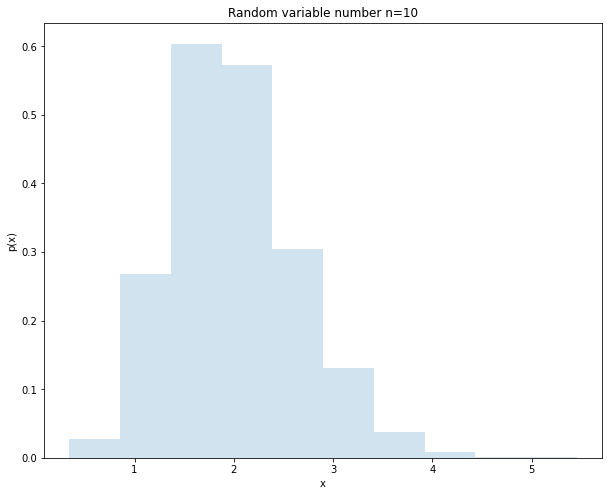

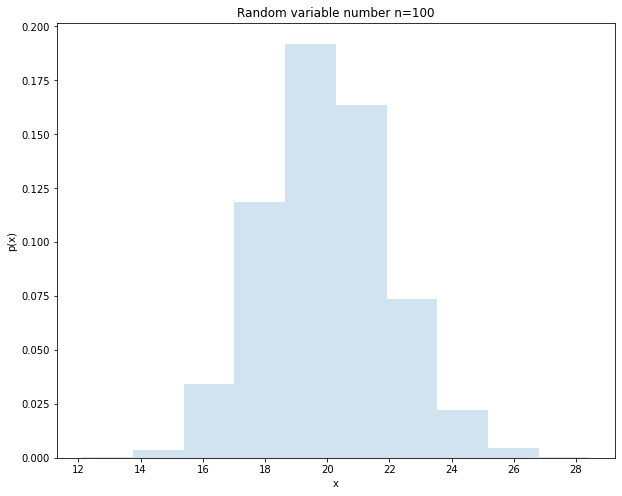

In [112]:
# 3. n个服从指数分布随机变量的和 的分布

x_size = 10000
lam = 5
distribution = expon(scale=1/lam)
variable_sum(n=10, x_size=x_size, distribution=distribution)
variable_sum(n=100, x_size=x_size, distribution=distribution)

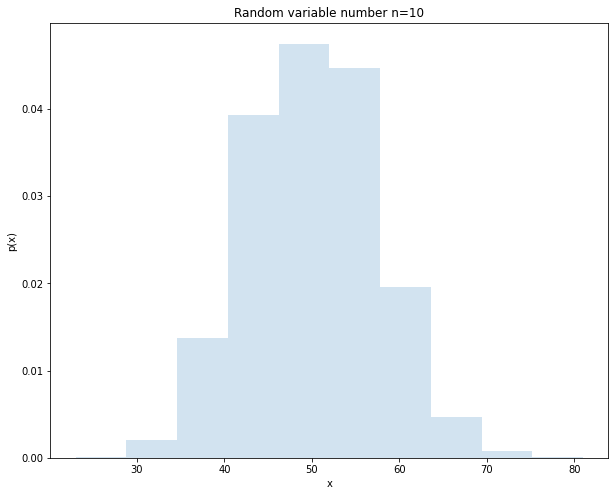

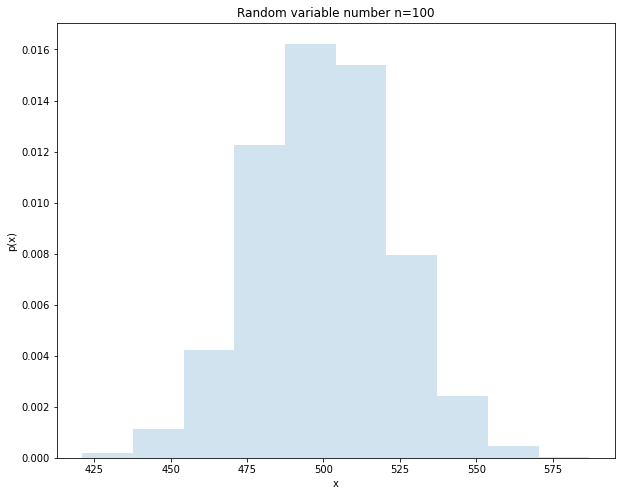

In [116]:
# 4. n个服从泊松分布随机变量的和 的分布

x_size = 10000
mu = 5
distribution = poisson(mu=mu)
variable_sum(n=10, x_size=x_size, distribution=distribution)
variable_sum(n=100, x_size=x_size, distribution=distribution)

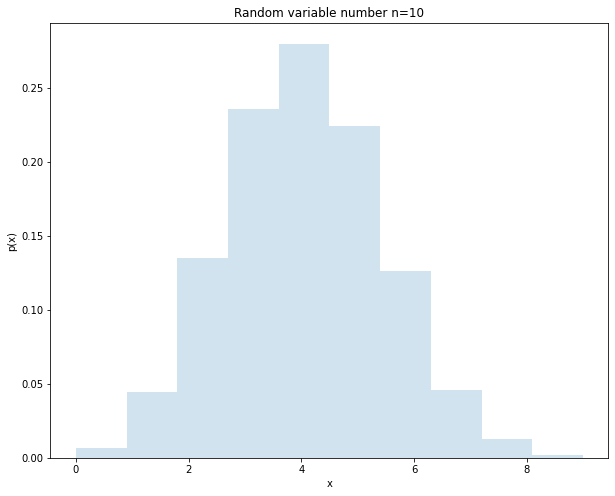

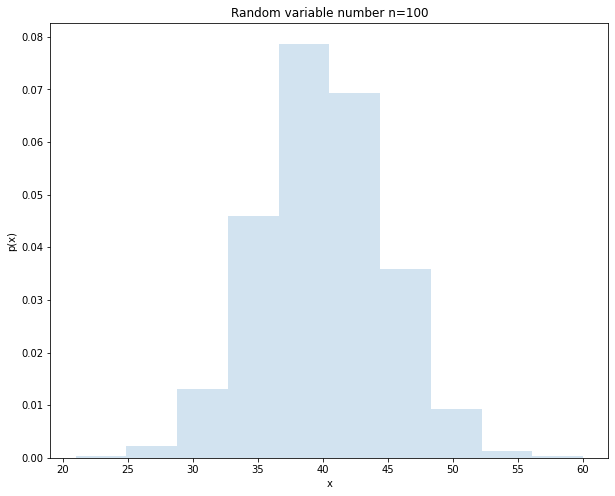

In [140]:
# 5. n个服从（0- 1）分布随机变量的和 的分布

def bernoulli_sum(n, x_size, p):
    X = 0
    for i in range(n):
        x_i = ss.bernoulli.rvs(p, size=x_size)
        X += x_i
    plt.figure(figsize=(10, 8))    
    plt.hist(X, density=True, histtype='stepfilled', alpha=0.2)
    plt.title("Random variable number n={}".format(str(n)))
    plt.xlabel("x")
    plt.ylabel("p(x)")
    plt.show()

x_size = 10000
p = 0.4
bernoulli_sum(n=10, x_size=x_size, p=p)
bernoulli_sum(n=100, x_size=x_size, p=p)

## 1.10 数学建模案例分析：投资组合分析

* 📕任务：GitModel公司是一家专业的投资银行，志在帮助客户更好地管理资产。客户手头上有一笔100万的资金，希望将这笔钱投入股票市场进行投资理财，投资人看中了两个股票$A$、$B$，股票分析师通过对股票$A$、$B$的历史数据分析发现：股票$A$的平均收益率近似服从$N(0.1,0.01)$，股票B的平均收益率近似服从$N(0.3,0.04)$。现在客户希望通过分析得出投资股票$A$、$B$的最佳组合（在预期收益率确定情况下最小风险时，需要投资$A$、$B$的份额）。

* 🦊解：由题意知：
股票$A, B$的收益$X, Y$服从如下分布
$$
 X \sim N(0.1, 0.01),  Y \sim N(0.3, 0.04)
$$
设投资股票$A$的份额为$p$, 则投资股票$B$的份额为$(1-p)$，其中$(0 \le p \le 1)$，总收益为$Z$，则
$$
Z = pX + (1-p)Y
$$
均值体现股票的平均收益率高低，方差体现股票的风险大小。则平均收益率为
$$
E(Z) = E(pX + (1-p)Y) = pE(X) + (1-p)E(Y)
$$
风险大小(目标函数)为
$$
\begin{aligned}
D(Z) &= D(pX + (1-p)Y) \\
&=D(pX) + D((1-p)Y) + 2Cov(pX, (1-p)Y) \\
&= p^{2}D(X) + (1-p)^{2}D(Y) + 2p(1-p)Cov(X, Y)
\end{aligned}
$$
由题意知，需要找到一个合适的$p*$，使得风险$D(Z)$最小
$$
venture = \underset{p^{*}}{argmin}\left[D(Z) \right ] = \underset{p^{*}}{argmin}\left [p^{2}D(X) + (1-p)^{2}D(Y) + 2p(1-p)Cov(X, Y) \right ]
$$

python代码（求解上题）

In [188]:
from sympy import *
from scipy.stats import norm 
from sympy.abc import p

X = norm(loc=0.1, scale=0.1)
Y = norm(loc=0.3, scale=0.2)
Dx, Dy = X.var(), Y.var()

def compute_risk(Dx, Dy, rho):
    # print("当相关系数rho={:.1f}时：".format(rho))
    Cov_xy = rho * sqrt(Dx) * sqrt(Dy)
    # 目标函数
    venture = p ** 2 * Dx + (1-p) ** 2 * Dy + 2 * p * (1-p) * Cov_xy
    # 求驻点
    venture_dp = diff(venture, p)
    p0 = solve(venture_dp)
    # print("\t驻点p0={:.2f}".format(p0[0]))
    # 判断在该点是否取得极小值
    venture_dp_2 = diff(venture_dp, p)
    temp = venture_dp_2.evalf(subs={p:p0[0]})
    if temp < 0:
        print("\t该点不是函数的极小值点。")      
    venture_min = venture.evalf(subs={p:p0[0]})
    # print("\t风险系数波动（方差）为：{:.4f}".format(venture_min))
    # print("\t此时投资股票A的份额应为：10w * {}, 投资股票B的份额应为：10w *{}".format(p0[0], 1-p0[0]))
    return p0[0], venture_min

rhos = [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ps = []
ventures = []
for rho in rhos:
    temp1, temp2 = compute_risk(Dx, Dy, rho)
    ps.append(temp1)
    ventures.append(temp2)

for idx, p in enumerate(ps):
    r = (idx - 10) * 0.1
    if (p > 1) or (p < 0):
        print("相关系数rho={:.2f}时，投资方案无实际意义。".format(r))
    else:
        print("当相关系数rho={:.2f}时：".format(r))
        print("\t风险系数波动（方差）为：{:.4f}".format(ventures[idx]))
        print("\t此时投资股票A的份额应为：10w * {}, 投资股票B的份额应为：10w *{}".format(p, 1-p))

当相关系数rho=-1.00时：
	风险系数波动（方差）为：0.0000
	此时投资股票A的份额应为：10w * 0.666666666666667, 投资股票B的份额应为：10w *0.333333333333333
当相关系数rho=-0.90时：
	风险系数波动（方差）为：0.0009
	此时投资股票A的份额应为：10w * 0.674418604651163, 投资股票B的份额应为：10w *0.325581395348837
当相关系数rho=-0.80时：
	风险系数波动（方差）为：0.0018
	此时投资股票A的份额应为：10w * 0.682926829268293, 投资股票B的份额应为：10w *0.317073170731707
当相关系数rho=-0.70时：
	风险系数波动（方差）为：0.0026
	此时投资股票A的份额应为：10w * 0.692307692307692, 投资股票B的份额应为：10w *0.307692307692308
当相关系数rho=-0.60时：
	风险系数波动（方差）为：0.0035
	此时投资股票A的份额应为：10w * 0.702702702702703, 投资股票B的份额应为：10w *0.297297297297297
当相关系数rho=-0.50时：
	风险系数波动（方差）为：0.0043
	此时投资股票A的份额应为：10w * 0.714285714285714, 投资股票B的份额应为：10w *0.285714285714286
当相关系数rho=-0.40时：
	风险系数波动（方差）为：0.0051
	此时投资股票A的份额应为：10w * 0.727272727272727, 投资股票B的份额应为：10w *0.272727272727273
当相关系数rho=-0.30时：
	风险系数波动（方差）为：0.0059
	此时投资股票A的份额应为：10w * 0.741935483870968, 投资股票B的份额应为：10w *0.258064516129032
当相关系数rho=-0.20时：
	风险系数波动（方差）为：0.0066
	此时投资股票A的份额应为：10w * 0.758620689655172, 投资股票B的份额应为：10w *0.241379310344828
当相关系数rho=-

输出结果为：  
当相关系数rho=-1.00时：

&emsp;&emsp;风险系数波动（方差）为：0.0000    
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.666666666666667, 投资股票B的份额应为：10w *0.333333333333333    

当相关系数rho=-0.90时：   
&emsp;&emsp;风险系数波动（方差）为：0.0009   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.674418604651163, 投资股票B的份额应为：10w *0.325581395348837   
当相关系数rho=-0.80时：    
&emsp;&emsp;风险系数波动（方差）为：0.0018   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.682926829268293, 投资股票B的份额应为：10w *0.317073170731707   
当相关系数rho=-0.70时：   
&emsp;&emsp;风险系数波动（方差）为：0.0026   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.692307692307692, 投资股票B的份额应为：10w *0.307692307692308    
当相关系数rho=-0.60时：   
&emsp;&emsp;风险系数波动（方差）为：0.0035   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.702702702702703, 投资股票B的份额应为：10w *0.297297297297297   
当相关系数rho=-0.50时：   
&emsp;&emsp;风险系数波动（方差）为：0.0043    
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.714285714285714, 投资股票B的份额应为：10w *0.285714285714286   
当相关系数rho=-0.40时：   
&emsp;&emsp;风险系数波动（方差）为：0.0051   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.727272727272727, 投资股票B的份额应为：10w *0.272727272727273   
当相关系数rho=-0.30时：   
&emsp;&emsp;风险系数波动（方差）为：0.0059   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.741935483870968, 投资股票B的份额应为：10w *0.258064516129032   
当相关系数rho=-0.20时：   
&emsp;&emsp;风险系数波动（方差）为：0.0066   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.758620689655172, 投资股票B的份额应为：10w *0.241379310344828   
当相关系数rho=-0.10时：   
&emsp;&emsp;风险系数波动（方差）为：0.0073   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.777777777777778, 投资股票B的份额应为：10w *0.222222222222222   
当相关系数rho=0.00时：   
&emsp;&emsp;风险系数波动（方差）为：0.0080   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.800000000000000, 投资股票B的份额应为：10w *0.200000000000000   
当相关系数rho=0.10时：   
&emsp;&emsp;风险系数波动（方差）为：0.0086    
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.826086956521739, 投资股票B的份额应为：10w *0.173913043478261   
当相关系数rho=0.20时：   
&emsp;&emsp;风险系数波动（方差）为：0.0091   
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.857142857142857, 投资股票B的份额应为：10w *0.142857142857143   
当相关系数rho=0.30时：   
&emsp;&emsp;风险系数波动（方差）为：0.0096     
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.894736842105263, 投资股票B的份额应为：10w *0.105263157894737     
当相关系数rho=0.40时：    
&emsp;&emsp;风险系数波动（方差）为：0.0099    
&emsp;&emsp;此时投资股票A的份额应为：10w * 0.941176470588235, 投资股票B的份额应为：10w *0.0588235294117647    
当相关系数rho=0.50时：    
&emsp;&emsp;风险系数波动（方差）为：0.0100    
&emsp;&emsp;此时投资股票A的份额应为：10w * 1.00000000000000, 投资股票B的份额应为：10w *0    
相关系数rho=0.60时，投资方案无实际意义。    
相关系数rho=0.70时，投资方案无实际意义。    
相关系数rho=0.80时，投资方案无实际意义。    
相关系数rho=0.90时，投资方案无实际意义。    
相关系数rho=1.00时，投资方案无实际意义。    